/var/folders/nn/by81v1n504z14cq7hr74_5g80000gn/T/ipykernel_7448/1671989053.py:46: RuntimeWarning: divide by zero encountered in divide
  spectrum = np.where(freqs==0, 0, 1/np.sqrt(freqs))


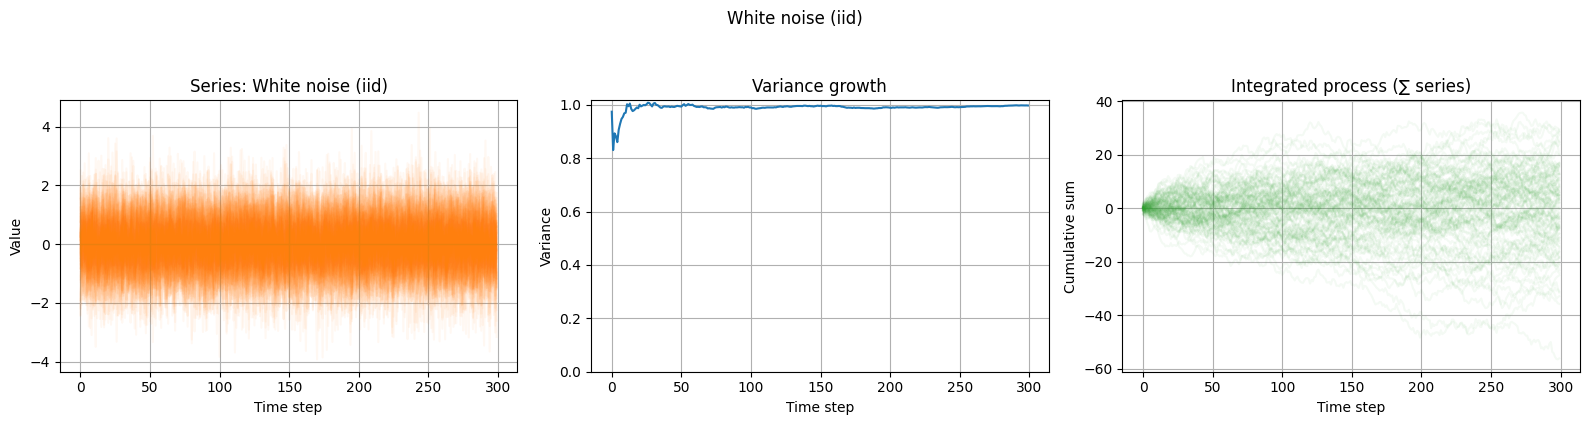

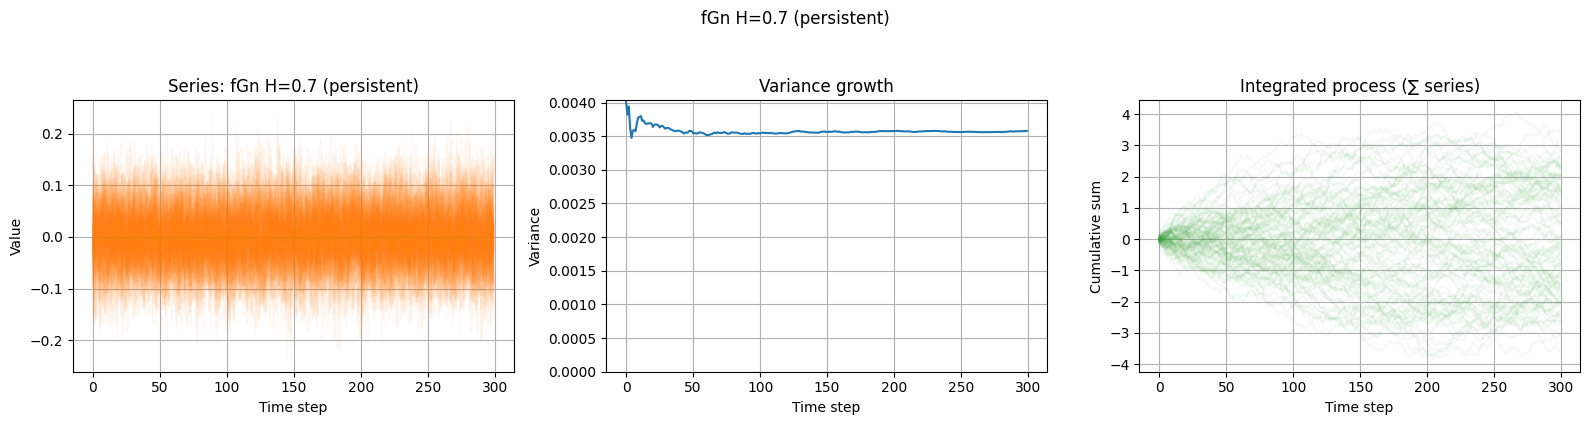

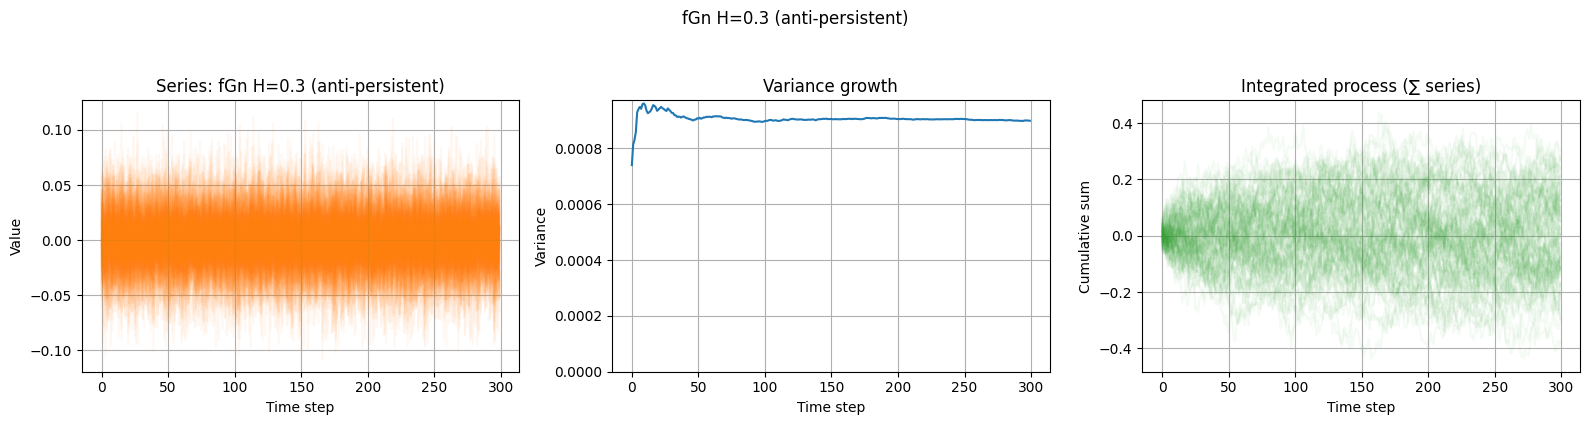

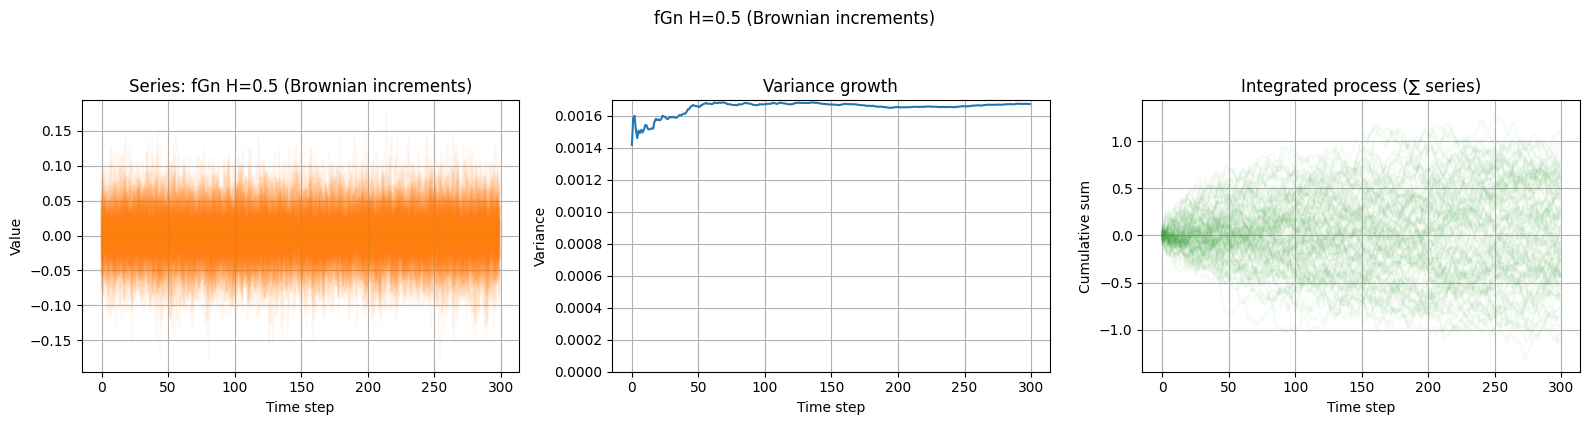

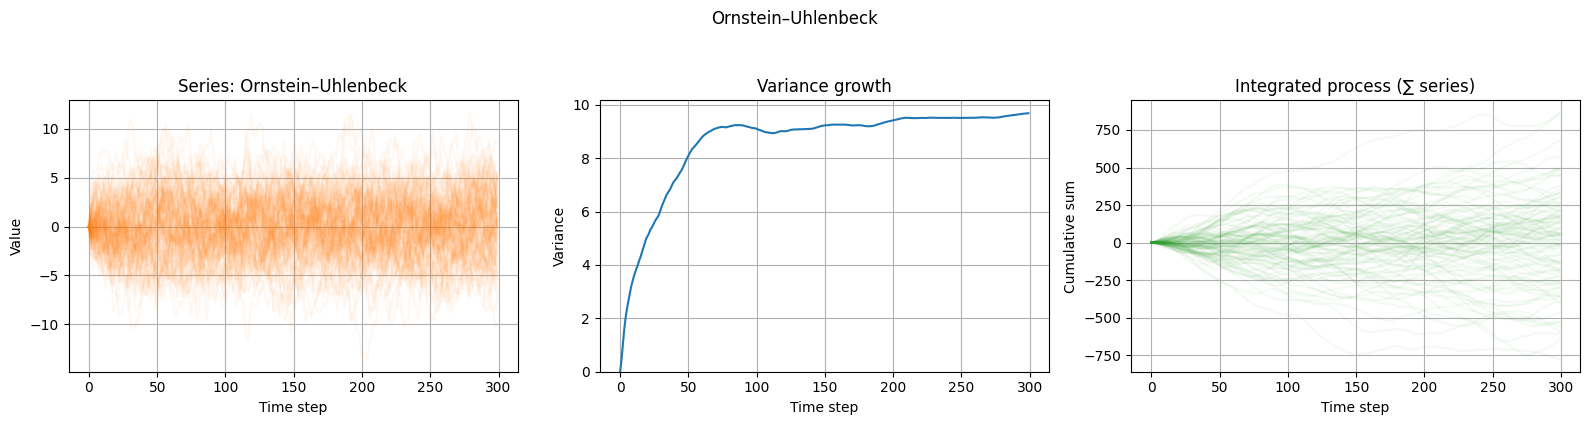

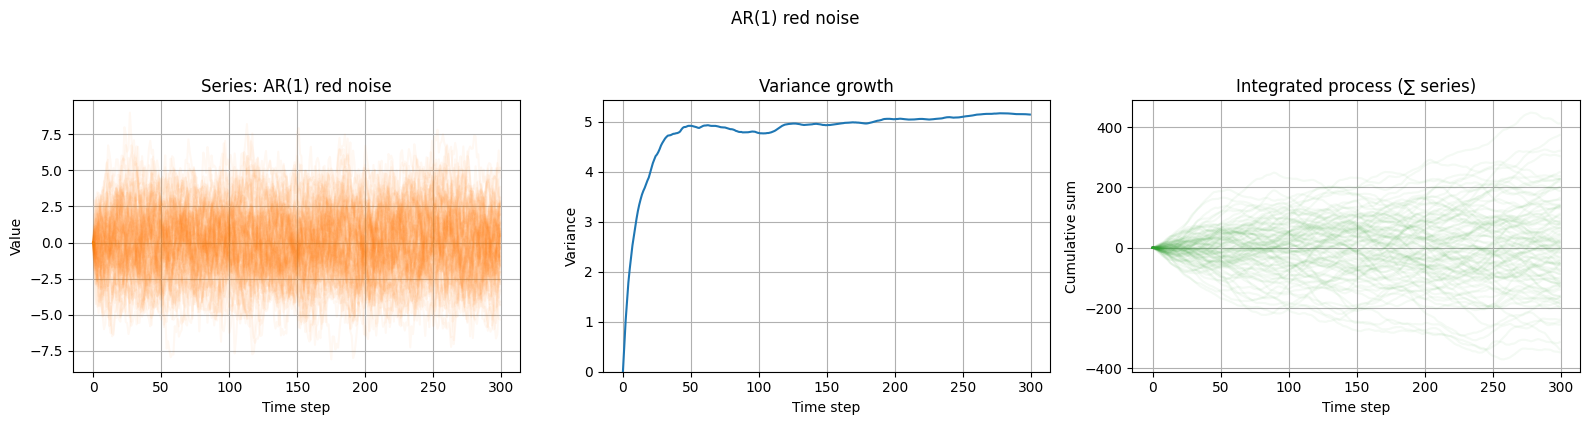

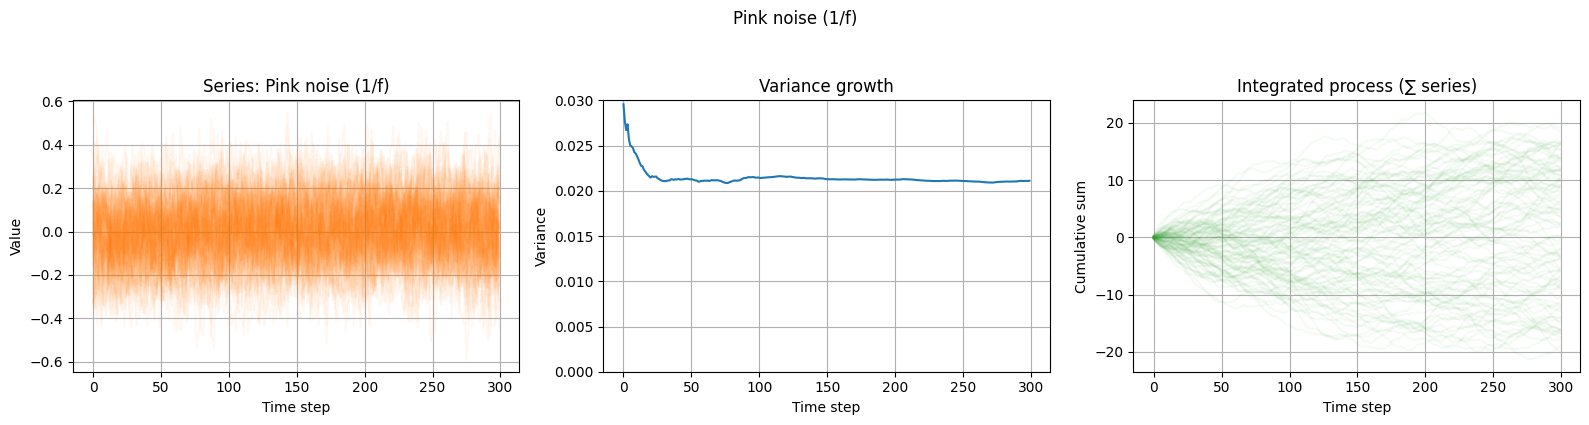

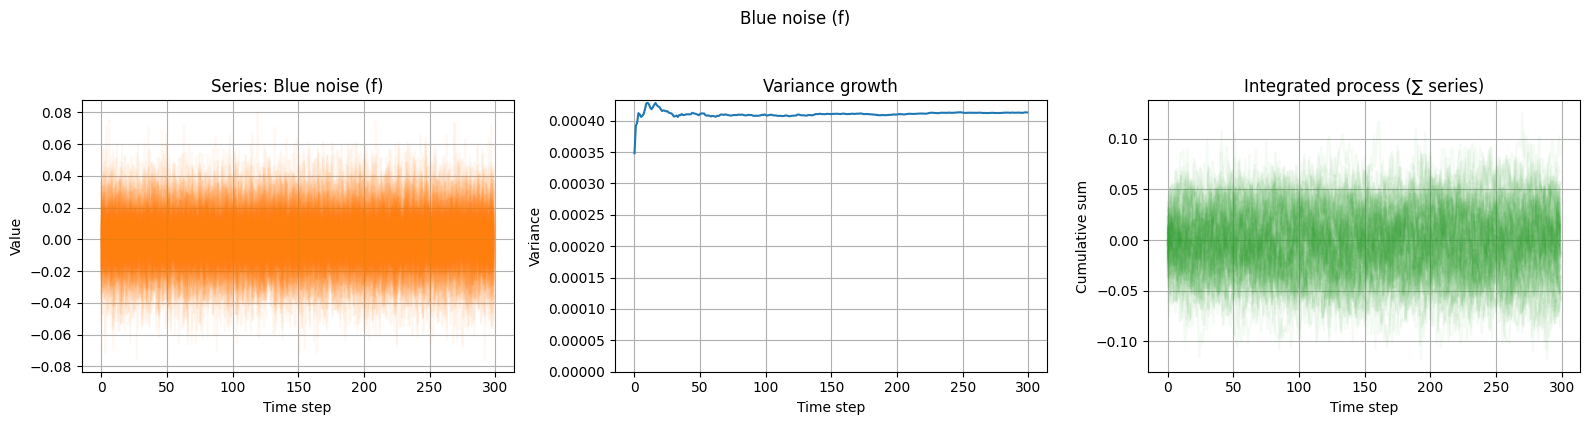

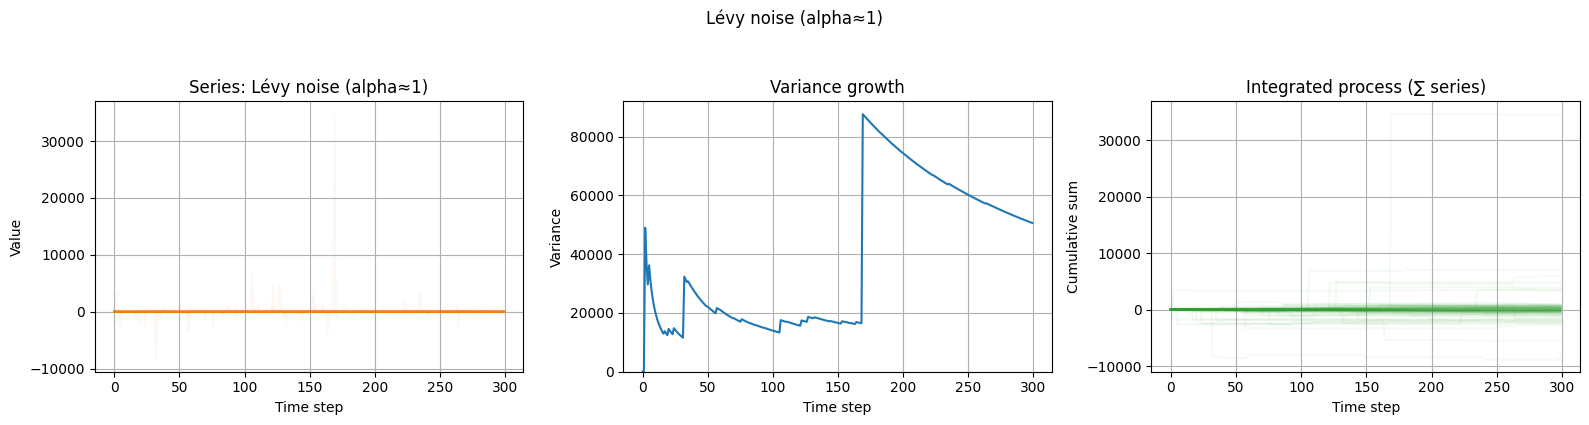

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_steps = 300        # шаги
n_paths = 100        # количество траекторий для отрисовки

# --- Функции генерации шумов (сэмплирование нескольких траекторий) ---

def white_noise(n, paths=1):
    return np.random.normal(0, 1, (paths, n))

def fgn(h, n, paths=1):
    result = []
    for _ in range(paths):
        freqs = np.fft.rfftfreq(2*n)
        spectrum = (freqs[1:]**(-2*h+1)) 
        spectrum = np.concatenate([[0], spectrum])
        phase = np.exp(2j*np.pi*np.random.rand(len(spectrum)))
        fgn_vals = np.fft.irfft(spectrum**0.5 * phase, 2*n)
        result.append(fgn_vals[:n])
    return np.array(result)

def ornstein_uhlenbeck(n, theta=0.05, sigma=1.0, paths=1):
    out = []
    for _ in range(paths):
        x = np.zeros(n)
        for t in range(1, n):
            x[t] = x[t-1] - theta*x[t-1] + sigma*np.random.normal()
        out.append(x)
    return np.array(out)

def ar1_process(n, phi=0.9, paths=1):
    out = []
    for _ in range(paths):
        x = np.zeros(n)
        for t in range(1, n):
            x[t] = phi*x[t-1] + np.random.normal()
        out.append(x)
    return np.array(out)

def pink_noise(n, paths=1):
    result = []
    for _ in range(paths):
        freqs = np.fft.rfftfreq(2*n)
        spectrum = np.where(freqs==0, 0, 1/np.sqrt(freqs))
        phase = np.exp(2j*np.pi*np.random.rand(len(spectrum)))
        vals = np.fft.irfft(spectrum * phase, 2*n)
        result.append(vals[:n])
    return np.array(result)

def blue_noise(n, paths=1):
    result = []
    for _ in range(paths):
        freqs = np.fft.rfftfreq(2*n)
        spectrum = np.sqrt(freqs)
        phase = np.exp(2j*np.pi*np.random.rand(len(spectrum)))
        vals = np.fft.irfft(spectrum * phase, 2*n)
        result.append(vals[:n])
    return np.array(result)

def levy_noise(n, alpha=1.0, paths=1):
    result = []
    for _ in range(paths):
        if alpha == 1:
            vals = np.random.standard_cauchy(n)
        else:
            vals = np.random.normal(size=n)**(1/alpha)
        result.append(vals)
    return np.array(result)

# --- Накопленная дисперсия ---
def rolling_var(x):
    return np.array([np.var(x[:, :i+1]) for i in range(x.shape[1])])

# --- Список шумов (сэмплируем по n_paths траекторий) ---
noises = {
    "White noise (iid)": white_noise(n_steps, n_paths),
    "fGn H=0.7 (persistent)": fgn(0.7, n_steps, n_paths),
    "fGn H=0.3 (anti-persistent)": fgn(0.3, n_steps, n_paths),
    "fGn H=0.5 (Brownian increments)": fgn(0.5, n_steps, n_paths),
    "Ornstein–Uhlenbeck": ornstein_uhlenbeck(n_steps, paths=n_paths),
    "AR(1) red noise": ar1_process(n_steps, paths=n_paths),
    "Pink noise (1/f)": pink_noise(n_steps, paths=n_paths),
    "Blue noise (f)": blue_noise(n_steps, paths=n_paths),
    "Lévy noise (alpha≈1)": levy_noise(n_steps, alpha=1, paths=n_paths),
}

# --- Визуализация ---
for name, series in noises.items():
    fig, axes = plt.subplots(1, 3, figsize=(16,4))

    # Левый график: ряды всех траекторий
    for path in series:
        axes[0].plot(path, color="tab:orange", alpha=0.05)
    axes[0].set_title(f"Series: {name}")
    axes[0].set_xlabel("Time step")
    axes[0].set_ylabel("Value")
    axes[0].grid(True)

    # Средний график: variance (усреднённое по всем траекториям)
    axes[1].plot(rolling_var(series), color="tab:blue")
    axes[1].set_title("Variance growth")
    axes[1].set_xlabel("Time step")
    axes[1].set_ylabel("Variance")
    axes[1].grid(True)
    axes[1].set_ylim(bottom=0)

    # Правый график: интегралы (кумулятивные суммы всех траекторий)
    fbm_paths = np.cumsum(series, axis=1)
    for path in fbm_paths:
        axes[2].plot(path, color="tab:green", alpha=0.05)
    axes[2].set_title("Integrated process (∑ series)")
    axes[2].set_xlabel("Time step")
    axes[2].set_ylabel("Cumulative sum")
    axes[2].grid(True)

    plt.suptitle(name, fontsize=12, y=1.05)
    plt.tight_layout()
    plt.show()


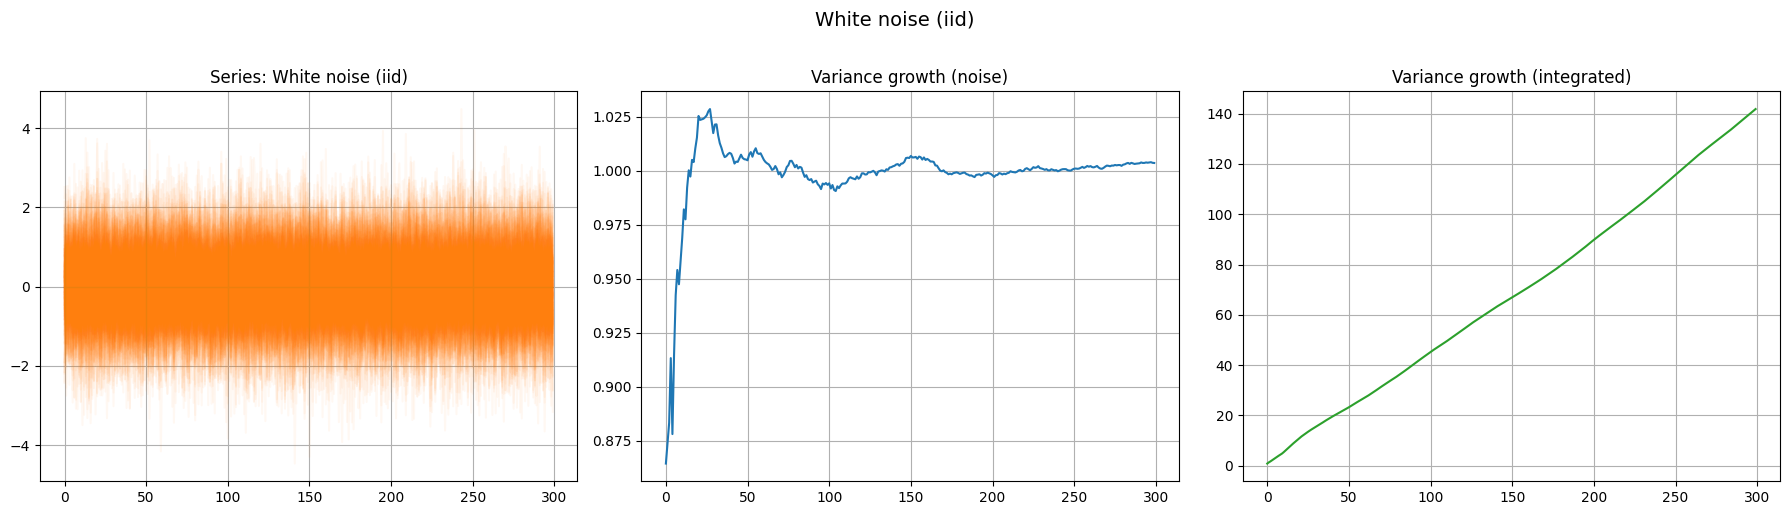

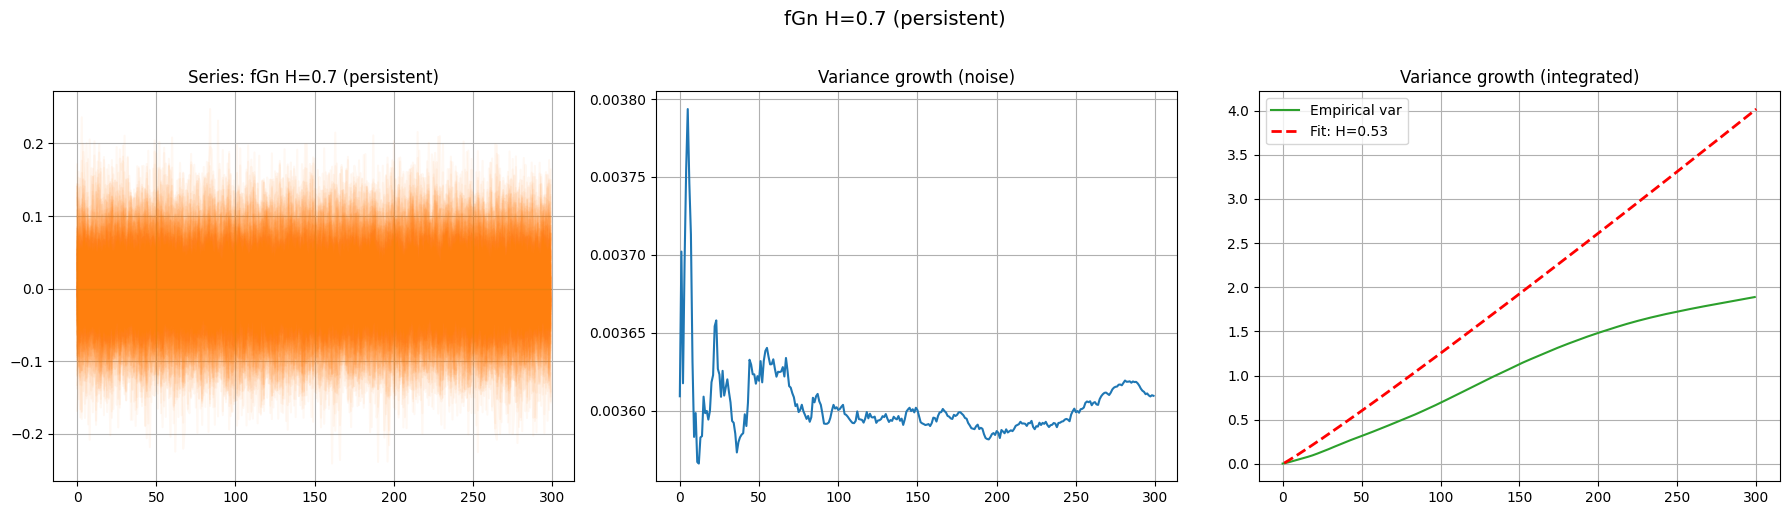

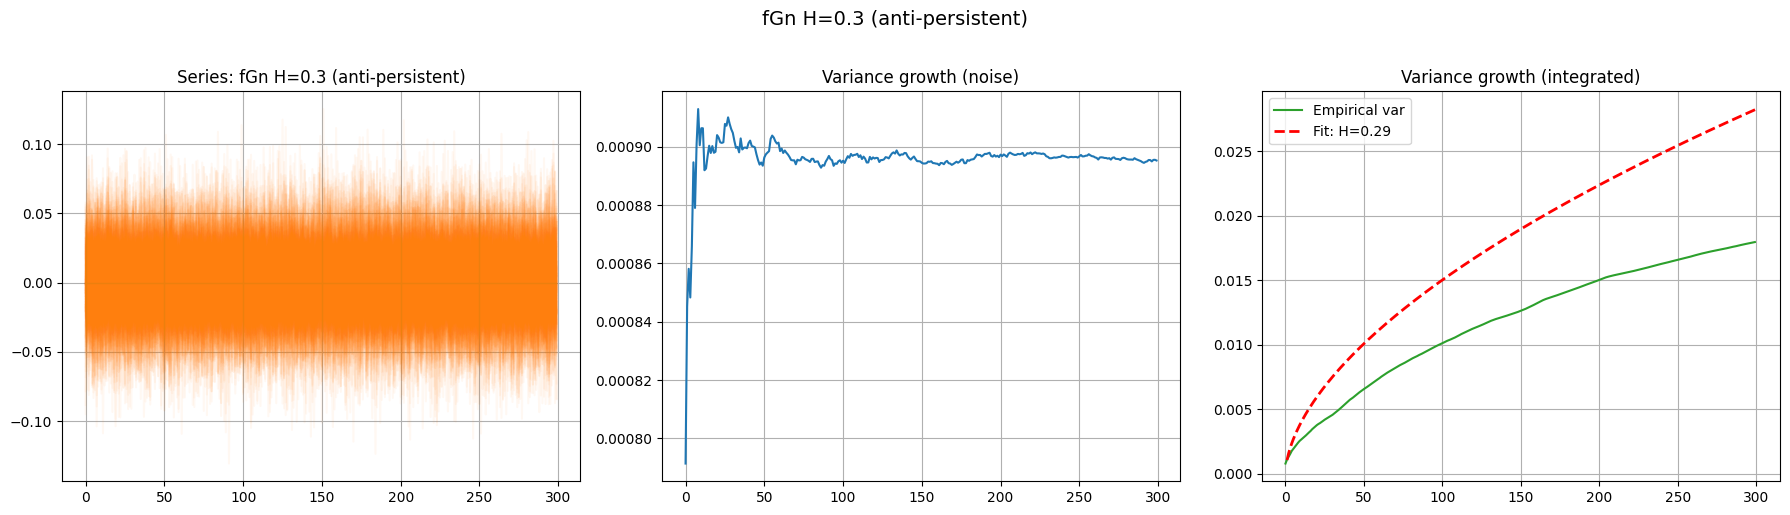

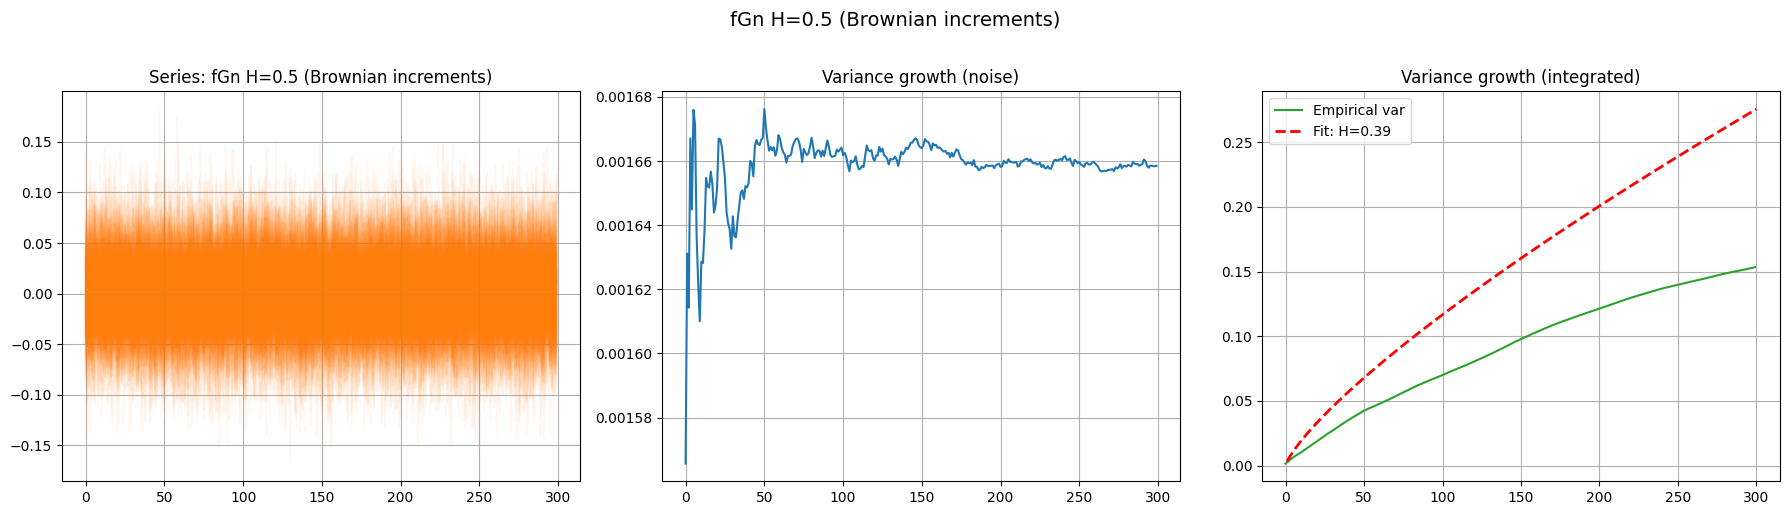

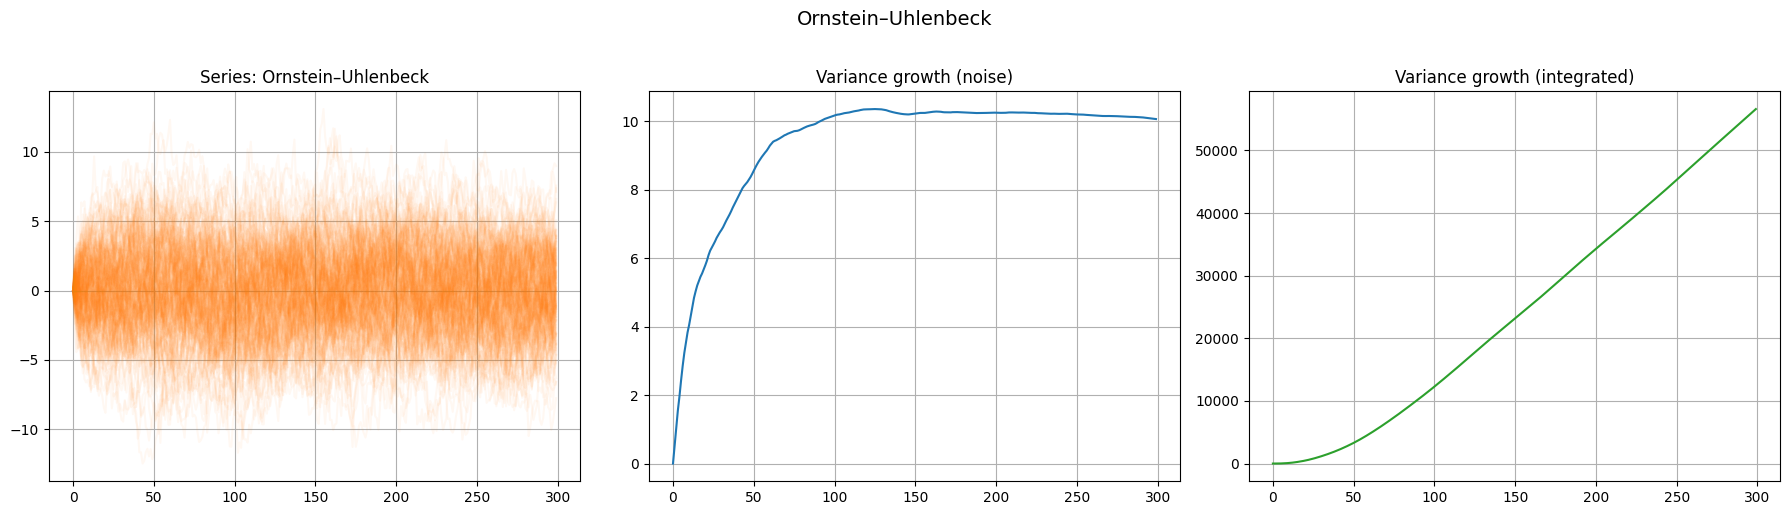

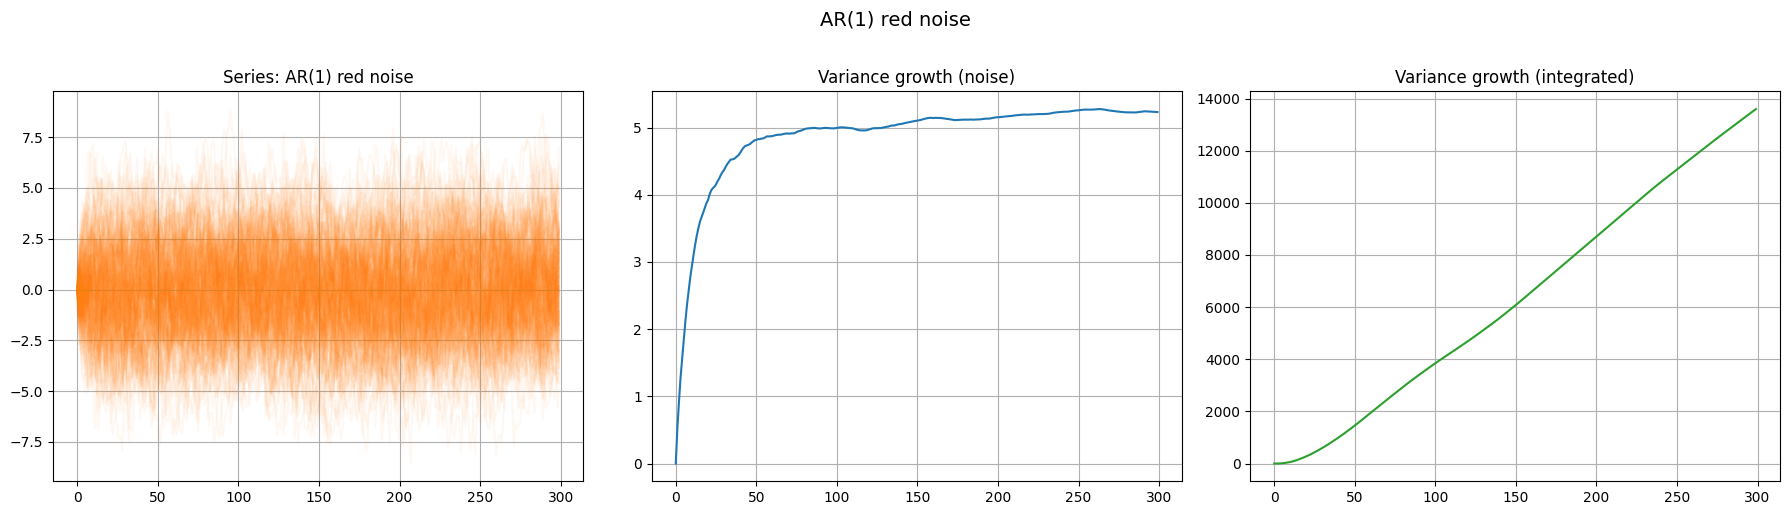

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_steps = 300
n_paths = 200  # количество траекторий

# --- генерация fGn ---
def fgn(h, n, paths=1):
    result = []
    for _ in range(paths):
        freqs = np.fft.rfftfreq(2*n)
        spectrum = (freqs[1:]**(-2*h+1)) 
        spectrum = np.concatenate([[0], spectrum])
        phase = np.exp(2j*np.pi*np.random.rand(len(spectrum)))
        fgn_vals = np.fft.irfft(spectrum**0.5 * phase, 2*n)
        result.append(fgn_vals[:n])
    return np.array(result)

# --- другие шумы ---
def white_noise(n, paths=1):
    return np.random.normal(0, 1, (paths, n))

def ornstein_uhlenbeck(n, theta=0.05, sigma=1.0, paths=1):
    out = []
    for _ in range(paths):
        x = np.zeros(n)
        for t in range(1, n):
            x[t] = x[t-1] - theta*x[t-1] + sigma*np.random.normal()
        out.append(x)
    return np.array(out)

def ar1_process(n, phi=0.9, paths=1):
    out = []
    for _ in range(paths):
        x = np.zeros(n)
        for t in range(1, n):
            x[t] = phi*x[t-1] + np.random.normal()
        out.append(x)
    return np.array(out)

# --- дисперсия ---
def rolling_var(x):
    return np.array([np.var(x[:, :i+1]) for i in range(x.shape[1])])

# --- оценка H и sigma ---
def estimate_hurst_and_sigma(paths):
    T = paths.shape[1]
    mean_path = paths.mean(axis=0)
    detrended = paths - mean_path
    var_t = detrended.var(axis=0)

    mask = var_t > 0
    t = np.arange(1, T+1)[mask]
    log_t = np.log(t)
    log_var = np.log(var_t[mask])

    coeffs = np.polyfit(log_t, log_var, deg=1)
    b, a = coeffs
    H_hat = b/2
    sigma_hat = np.exp(a/2)
    var_fit = (sigma_hat**2) * (t**(2*H_hat))

    return sigma_hat, H_hat, t, var_t[mask], var_fit

# --- список шумов ---
noises = {
    "White noise (iid)": white_noise(n_steps, n_paths),
    "fGn H=0.7 (persistent)": fgn(0.7, n_steps, n_paths),
    "fGn H=0.3 (anti-persistent)": fgn(0.3, n_steps, n_paths),
    "fGn H=0.5 (Brownian increments)": fgn(0.5, n_steps, n_paths),
    "Ornstein–Uhlenbeck": ornstein_uhlenbeck(n_steps, paths=n_paths),
    "AR(1) red noise": ar1_process(n_steps, paths=n_paths),
}

# --- визуализация ---
for name, series in noises.items():
    fig, axes = plt.subplots(1, 3, figsize=(18,5))

    # 1. шум
    for path in series:
        axes[0].plot(path, alpha=0.05, color="tab:orange")
    axes[0].set_title(f"Series: {name}")
    axes[0].grid(True)

    # 2. variance growth для шума
    axes[1].plot(rolling_var(series), color="tab:blue")
    axes[1].set_title("Variance growth (noise)")
    axes[1].grid(True)

    # 3. variance growth интеграла (fBm для fGn)
    fbm_paths = np.cumsum(series, axis=1)
    var_growth = rolling_var(fbm_paths)
    axes[2].plot(var_growth, color="tab:green", label="Empirical var")
    
    # если это fGn → добавим теоретическую линию
    if "fGn" in name:
        sigma_hat, H_hat, t, var_t, var_fit = estimate_hurst_and_sigma(fbm_paths)
        axes[2].plot(t, var_fit, "r--", lw=2, label=f"Fit: H={H_hat:.2f}")
        axes[2].legend()
    
    axes[2].set_title("Variance growth (integrated)")
    axes[2].grid(True)

    plt.suptitle(name, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()
